

# Project: Investigate a Dataset - [NO-Show-Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
> ‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('no_show.csv')

In [4]:
# first 5 lines
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# data frame dimensions
df.shape

(110527, 14)

In [6]:
# each column data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# apparently there is no null values in the data set
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# checking for duplicate rows
df.duplicated().sum()

0

In [9]:
# no duplicated rows

In [10]:
# statistical summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# checking for negative or 0 age
df[df['Age'] <= 0].shape

(3540, 14)


### Data Cleaning

 

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [13]:
# fixing some columns names
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [14]:
# dropping unnecessary columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [15]:
# converting to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [16]:
# fixing age
averageAge = df['Age'].mean()
df[df['Age'] <= 0] = averageAge

In [17]:
# converting no show column to integers for plotting
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
#creating a mask for people who showed
show = df['No_show'] == 0
didnt_show = df['No_show'] == 1
df['show'] = show
df['didnt_show'] = didnt_show

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null float64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null float64
Hypertension      110527 non-null float64
Diabetes          110527 non-null float64
Alcoholism        110527 non-null float64
Handicap          110527 non-null float64
SMS_received      110527 non-null float64
No_show           110527 non-null float64
show              110527 non-null bool
didnt_show        110527 non-null bool
dtypes: bool(2), float64(8), object(4)
memory usage: 10.3+ MB


In [20]:
# now the data is clean

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (comparing rate of showing and rate of not showing)

77.1820460159


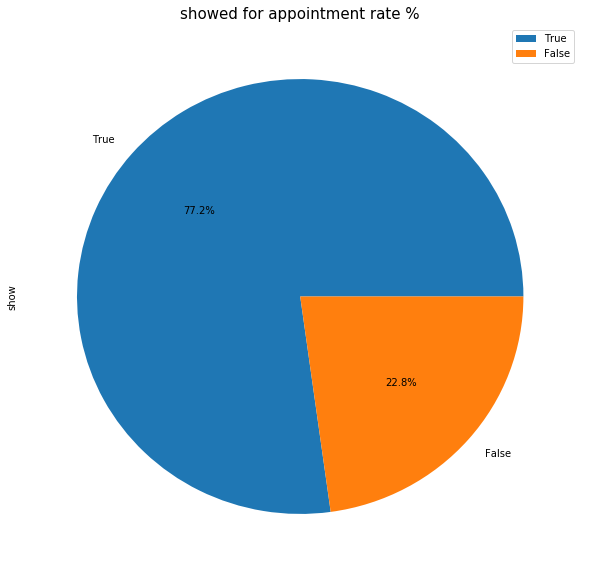

In [21]:
# making a piechart to compare
rate_1 = df['show'].value_counts()
print(rate_1[1] / rate_1.sum() * 100)
piechart = rate_1.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize=10);
piechart.set_title('showed for appointment rate %', fontsize=15);
plt.legend();


### Research Question 2  (important factor to predict if the patient will show up)

In [22]:
# age factor
df.Age[show].mean()

39.075187264820002

In [23]:
df.Age[didnt_show].mean()

35.329151291512915

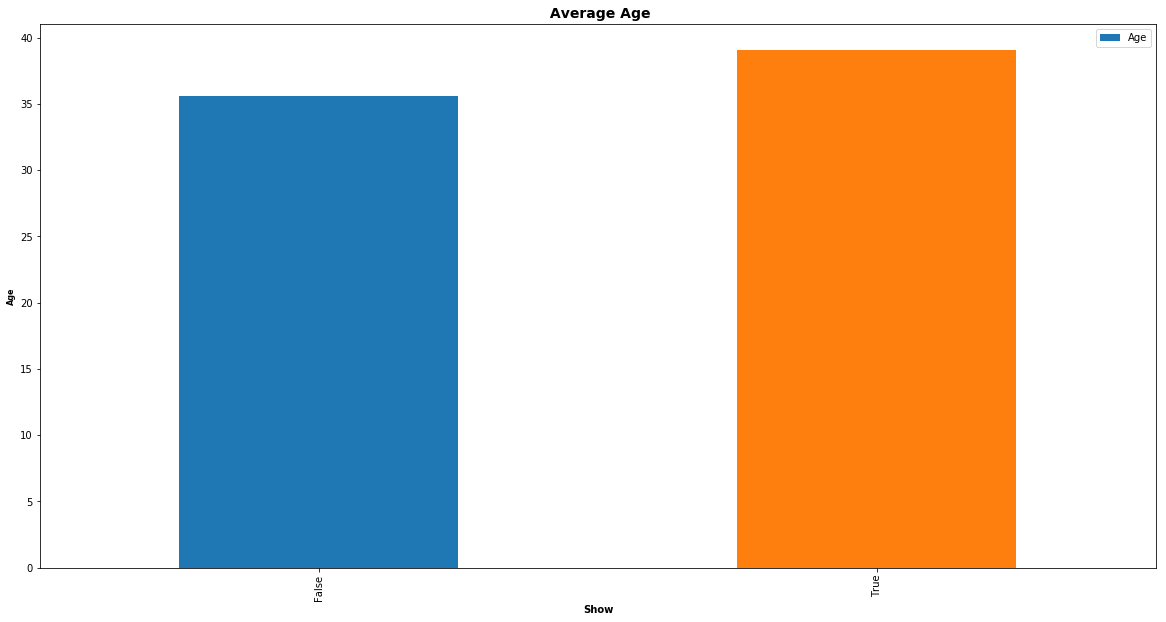

In [24]:
#creating function
def myfunction(df, grpVar=None, yVar=None, title=None, ylabel=None):
    '''base function for groupby plotting of dependent variables to no_show column'''
    # plotting
    df.groupby(grpVar)[yVar].mean().plot(figsize=(20,10), kind='bar')
    plt.title(f' {title}'.title(), fontsize = 14, weight = "bold")
    plt.xlabel(grpVar.title(), fontsize =10, weight = "bold")
    plt.ylabel(f'{ylabel}'.title(), fontsize = 8, weight='bold')
    plt.legend()

# average age of people who showed
myfunction(df, grpVar='show', yVar='Age', title='average age', ylabel='Age')

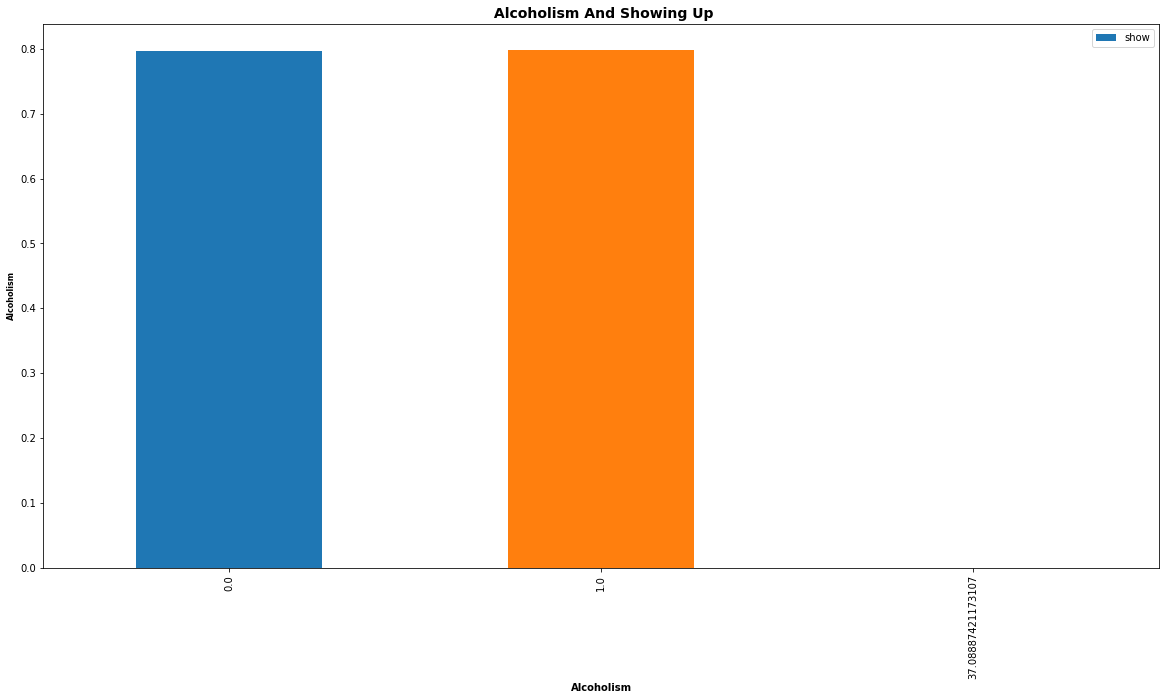

In [25]:
# relation between alcoholism and showing up
myfunction(df, grpVar='Alcoholism', yVar='show', title='Alcoholism and showing up', ylabel='Alcoholism')


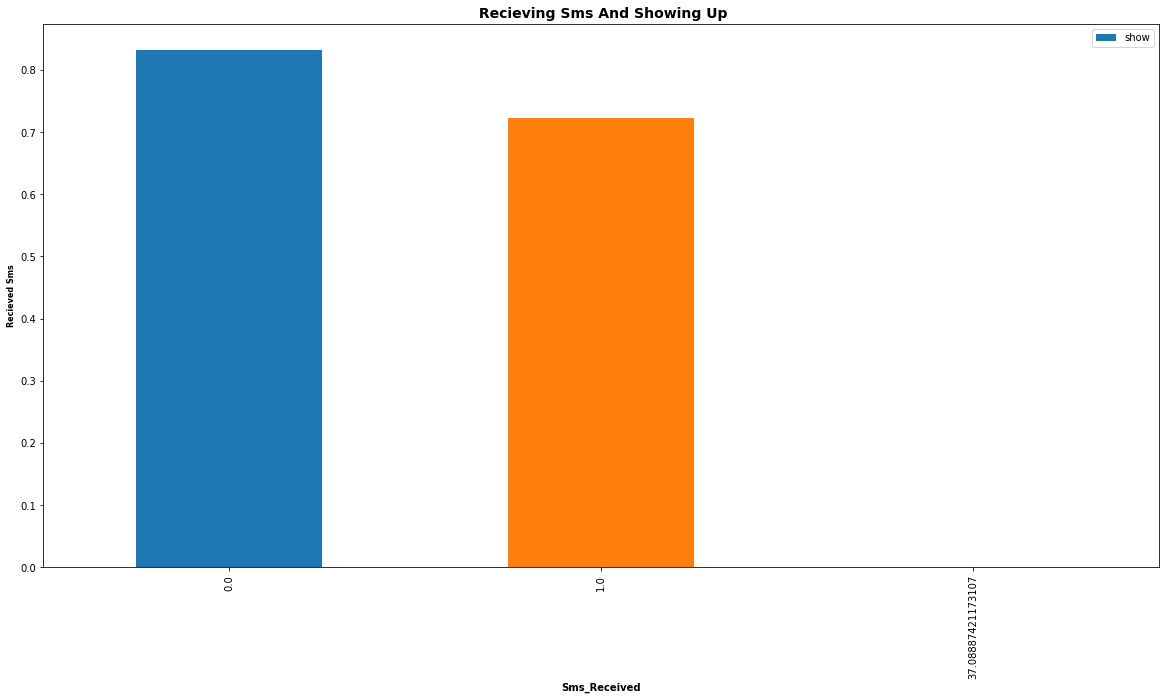

In [26]:
# relation between recieving sms and showing up
myfunction(df, grpVar='SMS_received', yVar='show', title='recieving sms and showing up', ylabel="recieved sms")

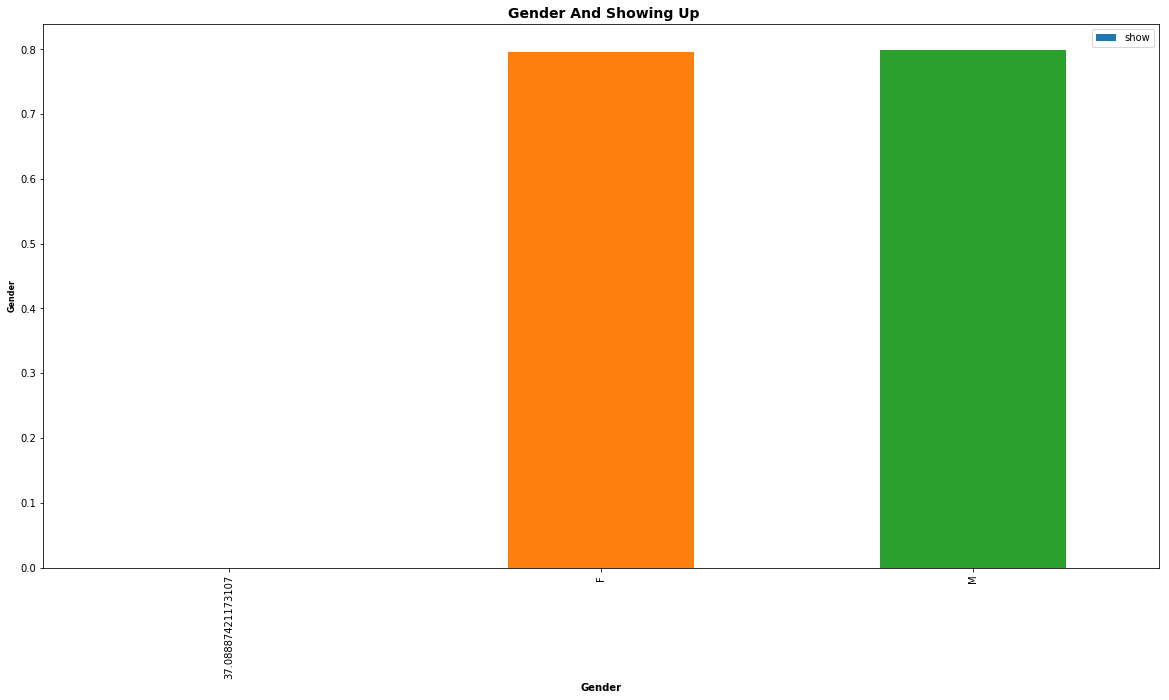

In [27]:
# relation between Gender and showing up
myfunction(df, grpVar='Gender', yVar='show', title='gender and showing up', ylabel='Gender')

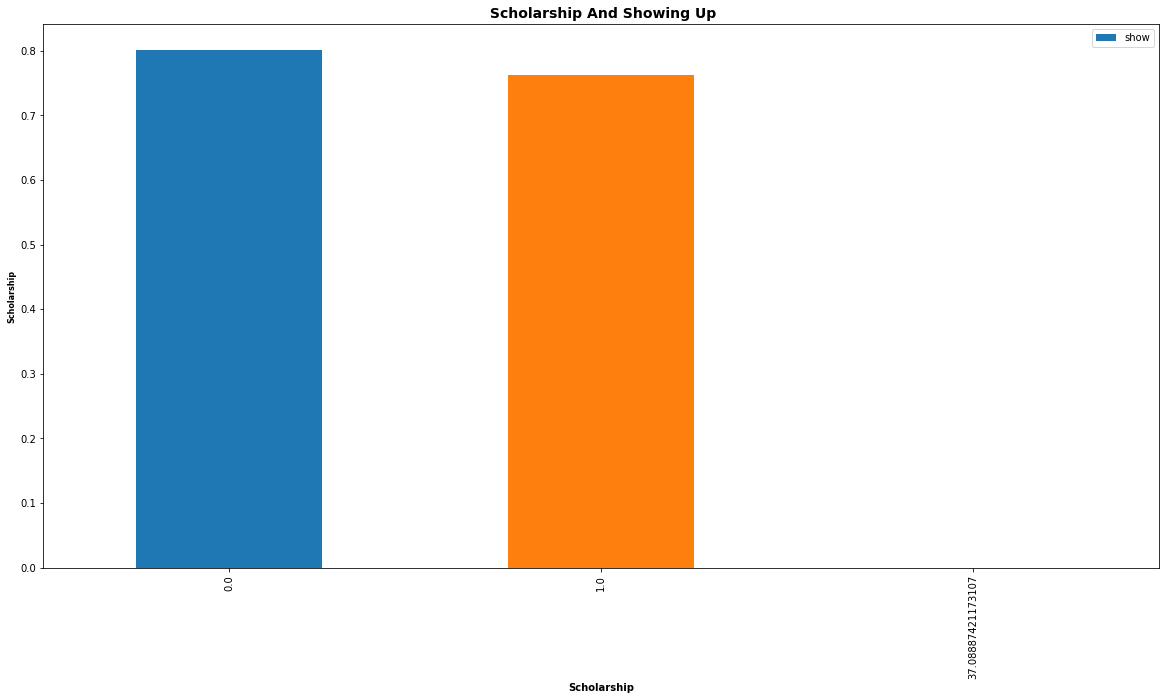

In [28]:
# relation between Scholarship and showing up
myfunction(df, grpVar='Scholarship', yVar='show', title='scholarship and showing up', ylabel='Scholarship')

<a id='conclusions'></a>
## Conclusions

> recieving sms is not an indicator that the patient will show up for his appointment.

> 22.8% of people who schedule an appointment didn't show up.

> patients who has a Scholarship is more likely going to miss thier appointment with 76.2% of showing up while patients who       don't have a Scholarship have the percentage of 80.1%.

> Gender and alcoholism are not factors to determine if the patient will show up for his appointment.

> Age is the most important factor to decide if the patient will show up or not as the average of age for people who will be     most likely to show up is 39.07518726482 , and for people who are not likely to show up is 35.329151291512915.

## limitations

> illogical data like patients with zero age or less.

> there may have been more useful factors that have more relationship with patients showing up for thier appointments like if     the patient is employed or not.

## Submitting your Project



In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0